In [23]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [24]:
# Read and load the CSV file

#local_folder='./Mydata/'
local_folder='./P3data/'

#local_folder='./singledata/'

local_csvfile='driving_log.csv'

# Subfolders where the additional data sets are
data_sets=[
    'middle2/'
    #'test1/' 
    #'bridge/',      # cross bridge
    #'center1/',  # keep on center of lane 1
    #'center2/',   # keep on center of lane 2
    #'center3/',   # keep on center of lane 3
    #'clockwise/',   # clockwise track
    #'curve1/',   # on curve track1
    #'curve2/',   # on curve track2
    #'curve3/',   # on curve track3
    #'leftside/',    # from leftside to center
    #'rightside/'    # from rightside to center
    
    #'1/'
] 

In [25]:
def crop_image(image):
    h=int(image.shape[0])
    w=int(image.shape[1]) 
    #Crop [Y1:Y2, X1:X2] #(0,50)-(w,h-20)
    return image[60:h-0, 0:w] # Top 50px # Bottom 20px

middle2/


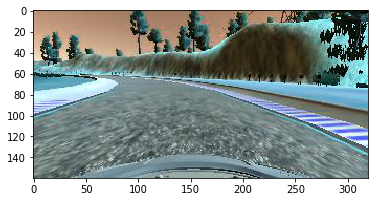

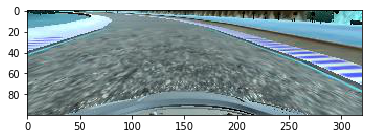

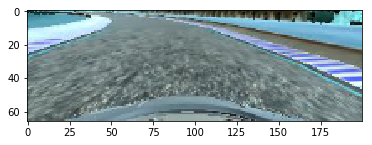

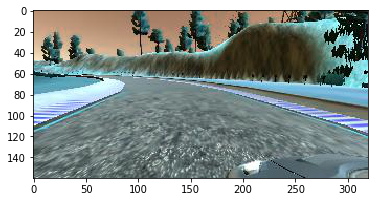

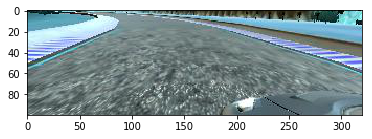

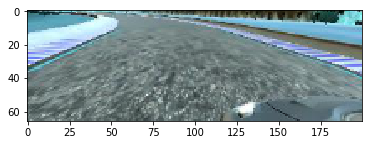

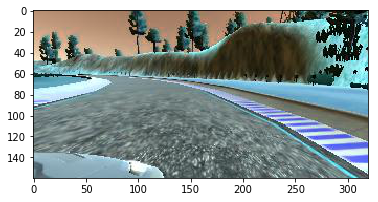

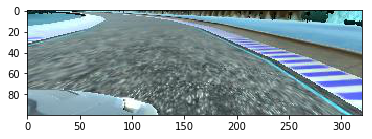

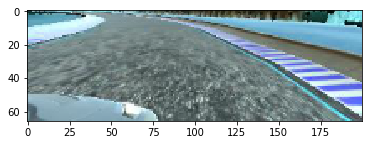

In [51]:


#'''
for data in data_sets:

    print(data)
    index = 0
    
    with open(local_folder+data+local_csvfile) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:

            for i in range(3): #load 0:center 1:left 2:right

                path=line[i]
                filename=path.split('/')[-1]
                local_path=local_folder+data+'IMG/'+filename
                
                if (index == 0) :
                    origin_img = cv2.imread(local_path)
                    #print(origin_img.shape)
                    plt.figure()
                    plt.imshow(origin_img)
                    
                    crop_img = copy.copy(origin_img)
                    crop_img = crop_image(crop_img)
                    #print(crop_img.shape)
                    plt.figure()
                    plt.imshow(crop_img)
                    
                    resize_img = copy.copy(crop_img)
                    resize_img = cv2.resize(resize_img, (200, 66))
                    #samples.append(image)
                    #print(resize_img.shape)
                    plt.figure()
                    plt.imshow(resize_img)
                    
                    #plt.figure(1, figsize=(15,15))
                    #plt.subplot(3, 3, i+1)
                    #plt.imshow(img)
                    
                    #plt.imshow(image)
                         
            
            #plt.show()                          
            index = index + 1

#'''

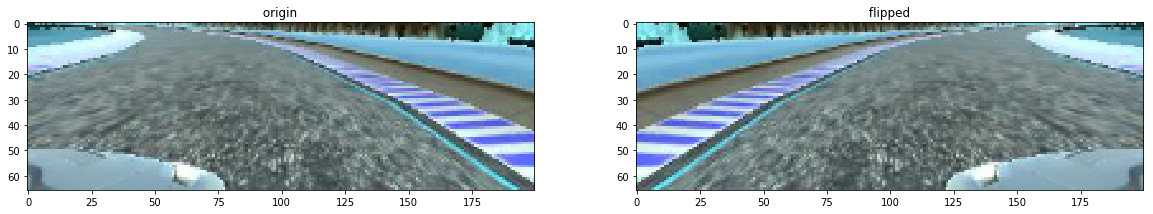

In [53]:
    filpped = (cv2.flip(resize_img,1))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.set_title(' origin ')
    ax1.imshow(resize_img)

    ax2.set_title(' flipped ')
    ax2.imshow(filpped)



In [27]:
'''

################ data preprocessing ################

1, normalization, /255
2, zero mean, -0.5
3, use left , right cameras,  thus dataset * 3
4, flip mirros images, thus dataset * 2
5, crop only the bottom part image to be trained

'''

'\n\n################ data preprocessing ################\n\n1, normalization, /255\n2, zero mean, -0.5\n3, use left , right cameras,  thus dataset * 3\n4, flip mirros images, thus dataset * 2\n5, crop only the bottom part image to be trained\n\n'

In [28]:
'''
below is only showing the effects of cropping, resizing
'''

'\nbelow is only showing the effects of cropping, resizing\n'

In [29]:


'''
for data in data_sets:

    print(data)
    index = 0
    
    with open(local_folder+data+local_csvfile) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:

            for i in range(3): #load 0:center 1:left 2:right

                path=line[i]
                filename=path.split('/')[-1]
                local_path=local_folder+data+'IMG/'+filename
                
                if (index == 0) :
                    origin_img = cv2.imread(local_path)
                    print(origin_img.shape)
                    plt.figure()
                    plt.imshow(origin_img)
                    
                    crop_img = copy.copy(origin_img)
                    crop_img = crop_image(crop_img)
                    print(crop_img.shape)
                    plt.figure()
                    plt.imshow(crop_img)
                    
                    resize_img = copy.copy(crop_img)
                    resize_img = cv2.resize(resize_img, (200, 66))
                    #samples.append(image)
                    print(resize_img.shape)
                    plt.figure()
                    plt.imshow(resize_img)
                    
                    #plt.figure(1, figsize=(15,15))
                    #plt.subplot(3, 3, i+1)
                    #plt.imshow(img)
                    
                    #plt.imshow(image)
                         
            
            plt.show()                          
            index = index + 1

'''

"\nfor data in data_sets:\n\n    print(data)\n    index = 0\n    \n    with open(local_folder+data+local_csvfile) as csvfile:\n        reader = csv.reader(csvfile)\n        for line in reader:\n\n            for i in range(3): #load 0:center 1:left 2:right\n\n                path=line[i]\n                filename=path.split('/')[-1]\n                local_path=local_folder+data+'IMG/'+filename\n                \n                if (index == 0) :\n                    origin_img = cv2.imread(local_path)\n                    print(origin_img.shape)\n                    plt.figure()\n                    plt.imshow(origin_img)\n                    \n                    crop_img = copy.copy(origin_img)\n                    crop_img = crop_image(crop_img)\n                    print(crop_img.shape)\n                    plt.figure()\n                    plt.imshow(crop_img)\n                    \n                    resize_img = copy.copy(crop_img)\n                    resize_img = cv2.resize(r

In [30]:
#print(resize_img.shape[0], resize_img.shape[1]) # 66 , 200

In [31]:
#print(np.min(resize_img), np.max(resize_img))

In [32]:
IMAGES_INPUT_SHAPE= (66,200,3) #(128,128,3) #(66,200,3)

In [33]:

'''
def generator(X, y , batch_size=32):
    num_samples = len(y)
    
    while 1: # Loop forever so the generator never terminates
        X, y = shuffle(X, y)
        
        for offset in range(0, num_samples, batch_size):
            #batch_samples = samples[offset:offset+batch_size]
            X_batch = X[offset:offset+batch_size]
            y_batch = y[offset:offset+batch_size]
            
            image = X[]
            croppred_img = crop_image(image) # (160,320,3)-->(65,320,3)


            resize_img = cv2.resize(croppred_img, (IMAGES_INPUT_SHAPE[1],IMAGES_INPUT_SHAPE[0])) #(65,320,3)->(66,200,3)

            
            yield sklearn.utils.shuffle(X_batch, y_batch)
'''

'\ndef generator(X, y , batch_size=32):\n    num_samples = len(y)\n    \n    while 1: # Loop forever so the generator never terminates\n        X, y = shuffle(X, y)\n        \n        for offset in range(0, num_samples, batch_size):\n            #batch_samples = samples[offset:offset+batch_size]\n            X_batch = X[offset:offset+batch_size]\n            y_batch = y[offset:offset+batch_size]\n            \n            image = X[]\n            croppred_img = crop_image(image) # (160,320,3)-->(65,320,3)\n\n\n            resize_img = cv2.resize(croppred_img, (IMAGES_INPUT_SHAPE[1],IMAGES_INPUT_SHAPE[0])) #(65,320,3)->(66,200,3)\n\n            \n            yield sklearn.utils.shuffle(X_batch, y_batch)\n'

In [34]:
def process_sequential_batch_generator(X, y, batch_size=32):

    N = len(y)
    batches_per_epoch = N // batch_size

    X,y=shuffle(X,y)

    i = 0

    while 1:
        start = i*batch_size
        end = start+batch_size - 1

        

        batch_X, batch_y = [], []

        for index in range(start,end):
            if (index>N-1): break
            measurement = y[index]
            image=X[index]

            #if (index==start):
            #    print(image.shape)
            
            # if original size (160, 320,3) then crop upper part of image
            if ( image.shape[0] == 160 and image.shape[1] == 320) :
                #print(" batch_generator: crop image: to 65, 320, 3 ")
                croppred_img = crop_image(image) # (160,320,3)-->(65,320,3)
                #if (index==start):
                #print(croppred_img.shape)
            else :
                #print(" batch_generator : dont need crop ")
                croppred_img = np.copy(image)
            
            #IMAGES_INPUT_SHAPE = (66 ,200,3)
            # if not (66, 200,3) then resize for nvida model
            if (croppred_img.shape[0] != IMAGES_INPUT_SHAPE[0] or croppred_img.shape[1] != IMAGES_INPUT_SHAPE[1] ) :
                #print(" batch_generator: resize image: to 66, 200, 3 ")
                resize_img = cv2.resize(croppred_img, (IMAGES_INPUT_SHAPE[1],IMAGES_INPUT_SHAPE[0])) #(65,320,3)->(66,200,3)
                #if (index==start):
                #print(resize_img.shape)
            else :
                #print(" batch_generator: dont need resize ")
                resize_img = np.copy(croppred_img)
                
            batch_X.append(resize_img)
            batch_y.append(measurement)

        i += 1
        if (i == batches_per_epoch-1):
            # reset the index so that we can cycle over the data_frame again
            i = 0

        yield (np.array(batch_X), np.array(batch_y))

In [35]:
'''

############ choose CNN architecure, LeNet to Nvidia #################

1, conv
2, dropout
3, maxpooling

4, use validation loss and train loss to validate above architecture, avoid overfitting and underfitting !!

'''

'\n\n############ choose CNN architecure, LeNet to Nvidia #################\n\n1, conv\n2, dropout\n3, maxpooling\n\n4, use validation loss and train loss to validate above architecture, avoid overfitting and underfitting !!\n\n'

In [36]:
def nvidia_model():
    model = Sequential()

    model.add(Lambda(
        
        # normalization and zero mean 
        lambda x: (x / 255.0) - 0.5, 
        input_shape=(66, 200, 3)
    ))

    model.add(Convolution2D(24,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
    model.add(Convolution2D(36,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
    model.add(Convolution2D(48,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
    #model.add(Dropout(.5))
    model.add(Convolution2D(64,3,3,border_mode='valid', activation='relu', subsample=(1,1)))
    model.add(Convolution2D(64,3,3,border_mode='valid', activation='relu', subsample=(1,1)))
    #model.add(Dropout(.5))
    
    model.add(Flatten())
    model.add(Dropout(.5))
    
    model.add(Dense(1164, activation='relu'))
    #model.add(Dropout(.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='tanh'))

    #adam = Adam(lr=0.0001)
    adam = Adam(lr=0.001)
    
    model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam')
    
    model.summary()
    return model


In [37]:
import cv2
import numpy as np
import sklearn
from sklearn.utils import shuffle

In [38]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout, ELU
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [40]:
def save_model(model):   
    '''

    #scores = model.evaluate(train_generator, validation_generator, verbose=0)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
     
    # serialize model to JSON
    model_json = model.to_json()
    print(".....Saved model.json to disk......")
    
    # this is only for model params
    #with open("model.json", "w") as json_file:
    with open("model-P3.json", "w") as json_file:
        json_file.write(model_json)
    
    
    # serialize weights to HDF5
    #model.save_weights("model-nvidia-weight.h5")
    model.save_weights("model-P3.h5")
    print("......Saved model weights to disk.........")
    '''

    
    model.save('model-bridge.h5')
    
    print("......Saved model drive version to disk.........")

In [41]:
from keras.models import model_from_json, load_model

def restore_model():
    '''
    # load json and create model
    #json_file = open('model.json', 'r')
    json_file = open('model-P3.json', 'r')
    
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    

    # load weights into new model
    #loaded_model.load_weights("model-nvidia-weight.h5")
    loaded_model.load_weights("model-P3.h5")
    print("Loaded model from disk")
    '''

    model = load_model('model-bridge.h5')
        
    adam = Adam(lr=0.001)
    #adam = Adam(lr=0.0001)
    
    # evaluate loaded model on test data
    #loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])
    
    #score = loaded_model.evaluate(X, Y, verbose=0)
    #print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    
    return model

In [42]:
images = []
measurements = []
samples = []

correction = 0.2
#zero_steer_pics = 0

def train_track(data, model):
#for data in data_sets:

    # train track by track, save model for each train and restore before next train:
    print('Loading data...', data)


    print(data)
    
    with open(local_folder+data+local_csvfile) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            samples.append(line)
            
            '''
            # limit zero steer pics
            if float(line[3])==0.0:
                zero_steer_pics = zero_steer_pics + 1
                if zero_steer_pics > 400:
                    continue
            '''


            # Prepare data and local paths
            for i in range(3): #load 0:center 1:left 2:right

                path=line[i]
                filename=path.split('/')[-1]
                local_path=local_folder+data+'IMG/'+filename
                image=cv2.imread(local_path)
                
                #print(image.shape)
                
                # cut above road part and bottom car part
                #image= crop_image(image)
                
                # Resize all images including validation sets
                #image = cv2.resize(image, (IMAGES_INPUT_SHAPE[1],IMAGES_INPUT_SHAPE[0]))
                
                '''
                 # if original size (160, 320,3) then crop upper part of image
                if ( image.shape[0] == 160 and image.shape[1] == 320) :
                    print(" train_track: crop image: to 65, 320, 3 ")
                    croppred_img = crop_image(image) # (160,320,3)-->(65,320,3)
                    #if (index==start):
                    print(croppred_img.shape)
                else :
                    print(" train_track: dont need crop ")
                    croppred_img = np.copy(image)

                #IMAGES_INPUT_SHAPE = (66 ,200,3)
                # if not (66, 200,3) then resize for nvida model
                if (croppred_img.shape[0] != IMAGES_INPUT_SHAPE[0] or croppred_img.shape[1] != IMAGES_INPUT_SHAPE[1] ) :
                    print(" train_track: resize image: to 66, 200, 3 ")
                    resize_img = cv2.resize(croppred_img, (IMAGES_INPUT_SHAPE[1],IMAGES_INPUT_SHAPE[0])) #(65,320,3)->(66,200,3)
                    #if (index==start):
                    print(resize_img.shape)
                else :
                    print(" train_track: dont need resize ")
                    resize_img = np.copy(croppred_img)               
                
                '''

                # Camera steering correction
                measurement = float(line[3])
                
                '''
                ############ balance data, needs to drop 90% steer/measurement =0 #############
                '''
                # for center steer =0, only save 10%
                if i == 0 :
                    if measurement == 0:
                        prob = np.random.random()   # generates a random number between 0 and 1
                        # only save 10% of steer ==0
                        if prob <= 0.1 :
                            measurements.append(measurement)
                            images.append(image)
                    else :
                        measurements.append(measurement)
                        images.append(image)
                if (i==1):
                    measurement += correction
                    # for left steer =0.2, only save 10%
                    if measurement == 0.2 :
                        prob = np.random.random()   # generates a random number between 0 and 1
                        # only save 10% of steer ==0
                        if prob <= 0.1 :
                            measurements.append(measurement)
                            images.append(image)
                    else :       
                        measurements.append(measurement)
                        images.append(image)
                elif(i==2):
                    #measurement += correction
                    measurement -= correction
                    # for right steer = -0.2, only save 10%
                    if measurement == -0.2 :
                        prob = np.random.random()   # generates a random number between 0 and 1
                        # only save 10% of steer ==0
                        if prob <= 0.1 :
                            measurements.append(measurement)
                            images.append(image)
                    else :       
                        measurements.append(measurement)
                        images.append(image)
                
    # for each sub directory
    print(len(images), len(measurements), len(samples))
    
    augmented_images, augmented_measurements = [], [] 
    for image, measurement in zip(images, measurements):
        augmented_images.append(image)
        augmented_measurements.append(measurement)
        augmented_images.append(cv2.flip(image,1))
        augmented_measurements.append(measurement*-1.0)
        
    assert len(images)==len(measurements)

    X_train = np.array(augmented_images)
    y_train = np.array(augmented_measurements)

                        
    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)


    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=rand_state)

    assert len(X_val)==len(y_val)
    print('Training datasets: {}'.format(len(y_train)))
    print('Validation datasets: {}'.format(len(y_val)))

    #return X_train, X_val, y_train, y_val

    print('training for each data track: ...', data)

    n_classes = len(set(y_train))
    plt.hist(y_train, bins=n_classes)
    plt.title('Number of examples of each steer in the training set')
    plt.xlabel('steer')
    plt.ylabel('Count')
    plt.plot()
    plt.show()

    train_generator = process_sequential_batch_generator(X_train, y_train, batch_size=32)
    validation_generator = process_sequential_batch_generator(X_val, y_val, batch_size=32)
    
    history_object = model.fit_generator(train_generator, 
                                     samples_per_epoch = len(y_train), 
                                     validation_data = validation_generator, 
                                     nb_val_samples = len(y_val), 
                                     nb_epoch=nb_epoch, verbose=1)
    
    ### print the keys contained in the history object
    print(history_object.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()
    
    #scores = model.evaluate(train_generator, validation_generator, verbose=0)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
     
    # serialize model to JSON
    save_model(model)

In [43]:

'''
print('training for each data track: ...', data)

X_train, X_val, y_train, y_val = train_track('bridge/')

train_generator = process_sequential_batch_generator(X_train, y_train, batch_size=32)
validation_generator = process_sequential_batch_generator(X_val, y_val, batch_size=32)
'''


"\nprint('training for each data track: ...', data)\n\nX_train, X_val, y_train, y_val = train_track('bridge/')\n\ntrain_generator = process_sequential_batch_generator(X_train, y_train, batch_size=32)\nvalidation_generator = process_sequential_batch_generator(X_val, y_val, batch_size=32)\n"

In [44]:
#test1_model = nvidia_model()
#test_nvidia_model = nvidia_model()
#balance_nvidia_model = nvidia_model()
bridge_nvidia_model = nvidia_model()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 66, 200, 3)    0           lambda_input_5[0][0]             
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_7 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_6[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 5, 22, 48)     43248       convolution2d_7[0][0]            
___________________________________________________________________________________________

In [27]:
'''

##################  more tracks collection ##############

1, with accepted train loss and valid loss, car still runs off track, needs various tracks !

'''

'\n\n##################  more tracks collection ##############\n\n1, with accepted train loss and valid loss, car still runs off track, needs various tracks !\n\n'

In [45]:
nb_epoch = 5 #5 #20

Loading data... middle2/
middle2/
644 644 716
Training datasets: 1030
Validation datasets: 258
training for each data track: ... middle2/


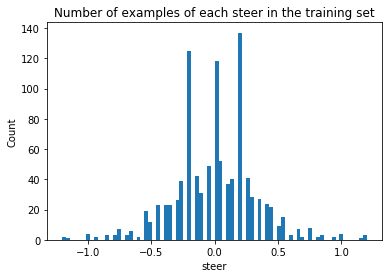

Epoch 1/5
1023/1030 [============================>.] - ETA: 0s - loss: 0.0702 - acc: 0.1134 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


1054/1030 [==============================] - 7s - loss: 0.0697 - acc: 0.1148 - val_loss: 0.0587 - val_acc: 0.1398
Epoch 2/5
1054/1030 [==============================] - 7s - loss: 0.0461 - acc: 0.1139 - val_loss: 0.0516 - val_acc: 0.1326

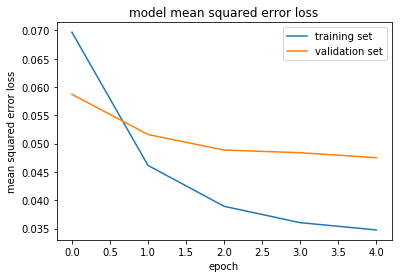

......Saved model drive version to disk.........


In [46]:


#train_track('middle1/', test_nvidia_model)

#train_track('middle2/', balance_nvidia_model)

train_track('middle2/', bridge_nvidia_model)




Loading data... turn2left_afterbridge/
turn2left_afterbridge/
1052 1052 1167
Training datasets: 1683
Validation datasets: 421
training for each data track: ... turn2left_afterbridge/


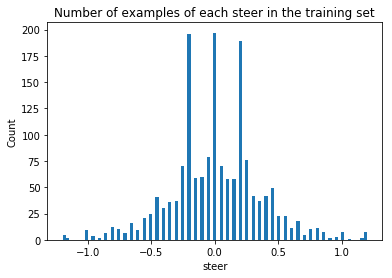

Epoch 1/5
1674/1683 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.1153 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


1705/1683 [==============================] - 12s - loss: 0.0479 - acc: 0.1161 - val_loss: 0.0518 - val_acc: 0.1060
Epoch 2/5
1705/1683 [==============================] - 11s - loss: 0.0434 - acc: 0.1179 - val_loss: 0.0495 - val_acc: 0.1106

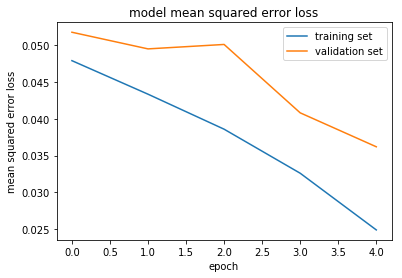

......Saved model drive version to disk.........


In [47]:
'''

1st fails when cross the bridge, but rushs out of right edge at 1st sharp turn left, 
so add track of this particular area only !

'''
afterbrighe_model= restore_model()

nb_epoch = 5

train_track('turn2left_aterbridge/', model=afterbrighe_model)

Loading data... leftedge1/
leftedge1/
2659 2659 2308
Training datasets: 4254
Validation datasets: 1064
training for each data track: ... leftedge1/


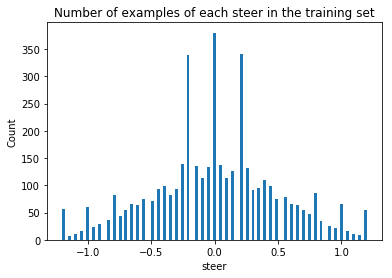

Epoch 1/3
4247/4254 [============================>.] - ETA: 0s - loss: 0.0921 - acc: 0.0918  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


4278/4254 [==============================] - 29s - loss: 0.0919 - acc: 0.0921 - val_loss: 0.0774 - val_acc: 0.0876
Epoch 2/3
4278/4254 [==============================] - 28s - loss: 0.0735 - acc: 0.0975 - val_loss: 0.0706 - val_acc: 0.0894

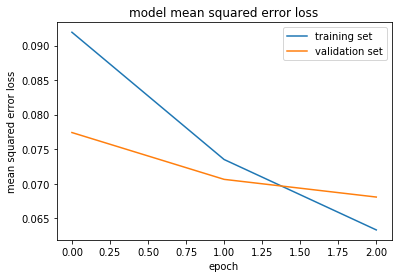

......Saved model drive version to disk.........


In [49]:
#afterbrighe_model.save('model-afterbridge.h5')

'''

after adding new tracks, now even cannot reach bridge !!

'''

leftedge_model= restore_model()

nb_epoch = 3

train_track('leftedge1/', model=leftedge_model)

Loading data... curve1/
curve1/
3810 3810 3746
Training datasets: 6096
Validation datasets: 1524
training for each data track: ... curve1/


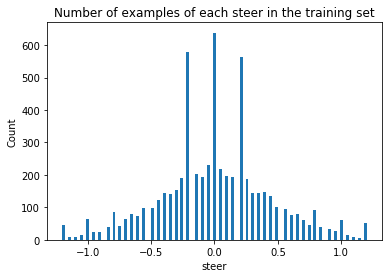

Epoch 1/3
6076/6096 [============================>.] - ETA: 0s - loss: 0.0574 - acc: 0.1124  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


6107/6096 [==============================] - 41s - loss: 0.0572 - acc: 0.1127 - val_loss: 0.0579 - val_acc: 0.1090
Epoch 2/3
6107/6096 [==============================] - 40s - loss: 0.0474 - acc: 0.1154 - val_loss: 0.0507 - val_acc: 0.1077

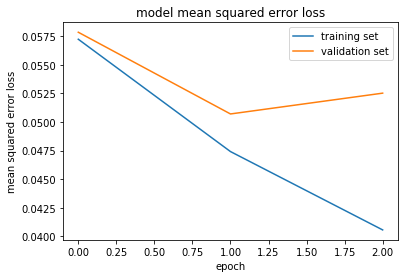

......Saved model drive version to disk.........


In [50]:
'''

after adding new tracks, now even cannot reach bridge !!

'''

curve1_model= restore_model()

nb_epoch = 3

train_track('curve1/', model=curve1_model)

In [16]:
'''
############ val_loss is hard to reduce now, overfitting needs to be solved ###################

1, reduce epochs
2, reduce conv layers ? add more dropout, maxpooling?
3, keep adding new tracks, especially where the car always fail to pass, i.e. the 1st sharp curve to left

'''
#nb_epoch = 3 #5 #5 #20

In [ ]:
'''

########### verify test1/ with simluation: 
'''